In [54]:
#heart attack analysis and prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import ydata_profiling as pp
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

In [55]:

df = pd.read_csv("heart.csv")

In [56]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [60]:
df.shape

(303, 14)

In [61]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [62]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [63]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: >

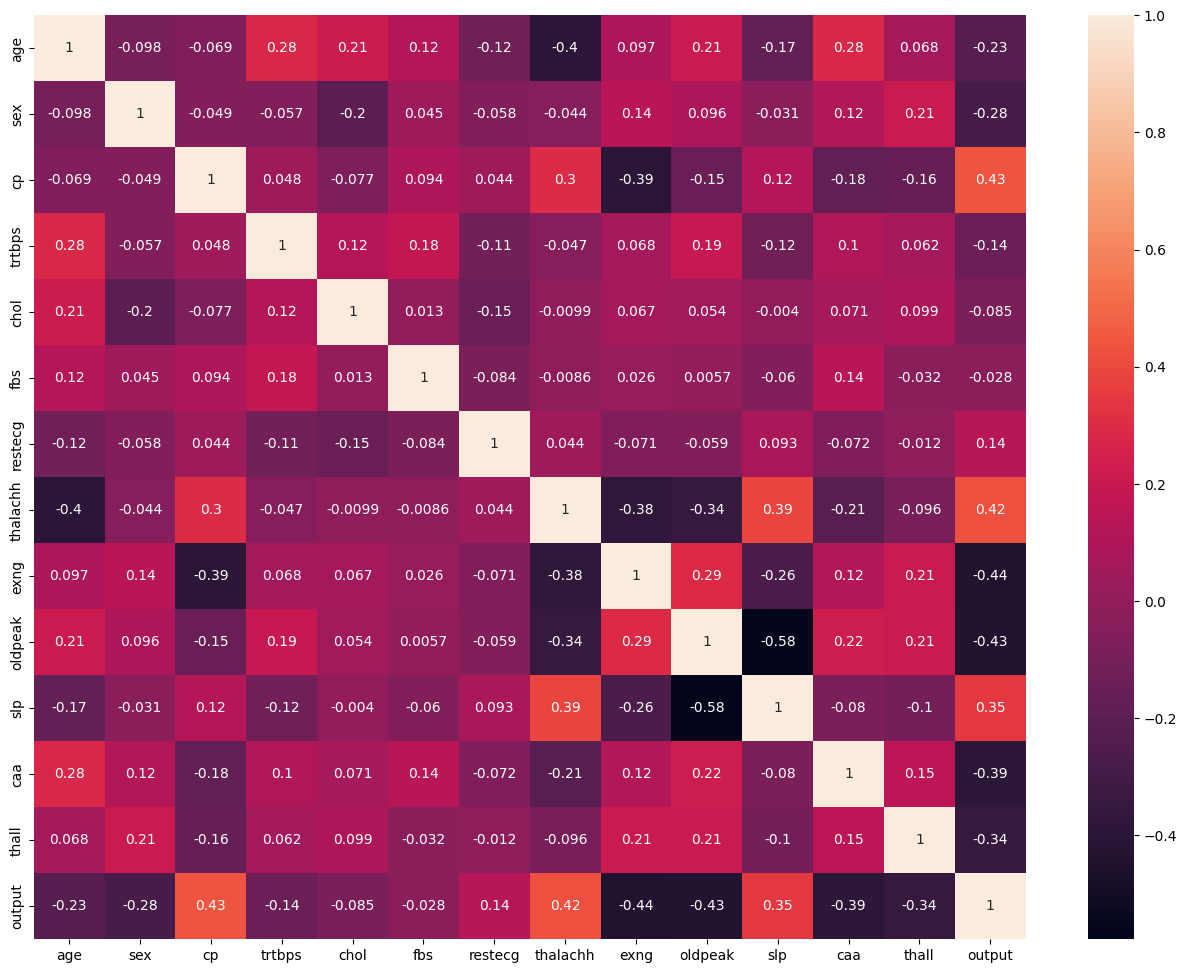

In [64]:
#calculation of correlation matrix
corr=df.corr()
plt.subplots(figsize=(16,12))
sns.heatmap(corr,xticklabels=corr.columns,
            yticklabels=corr.columns,annot=True)

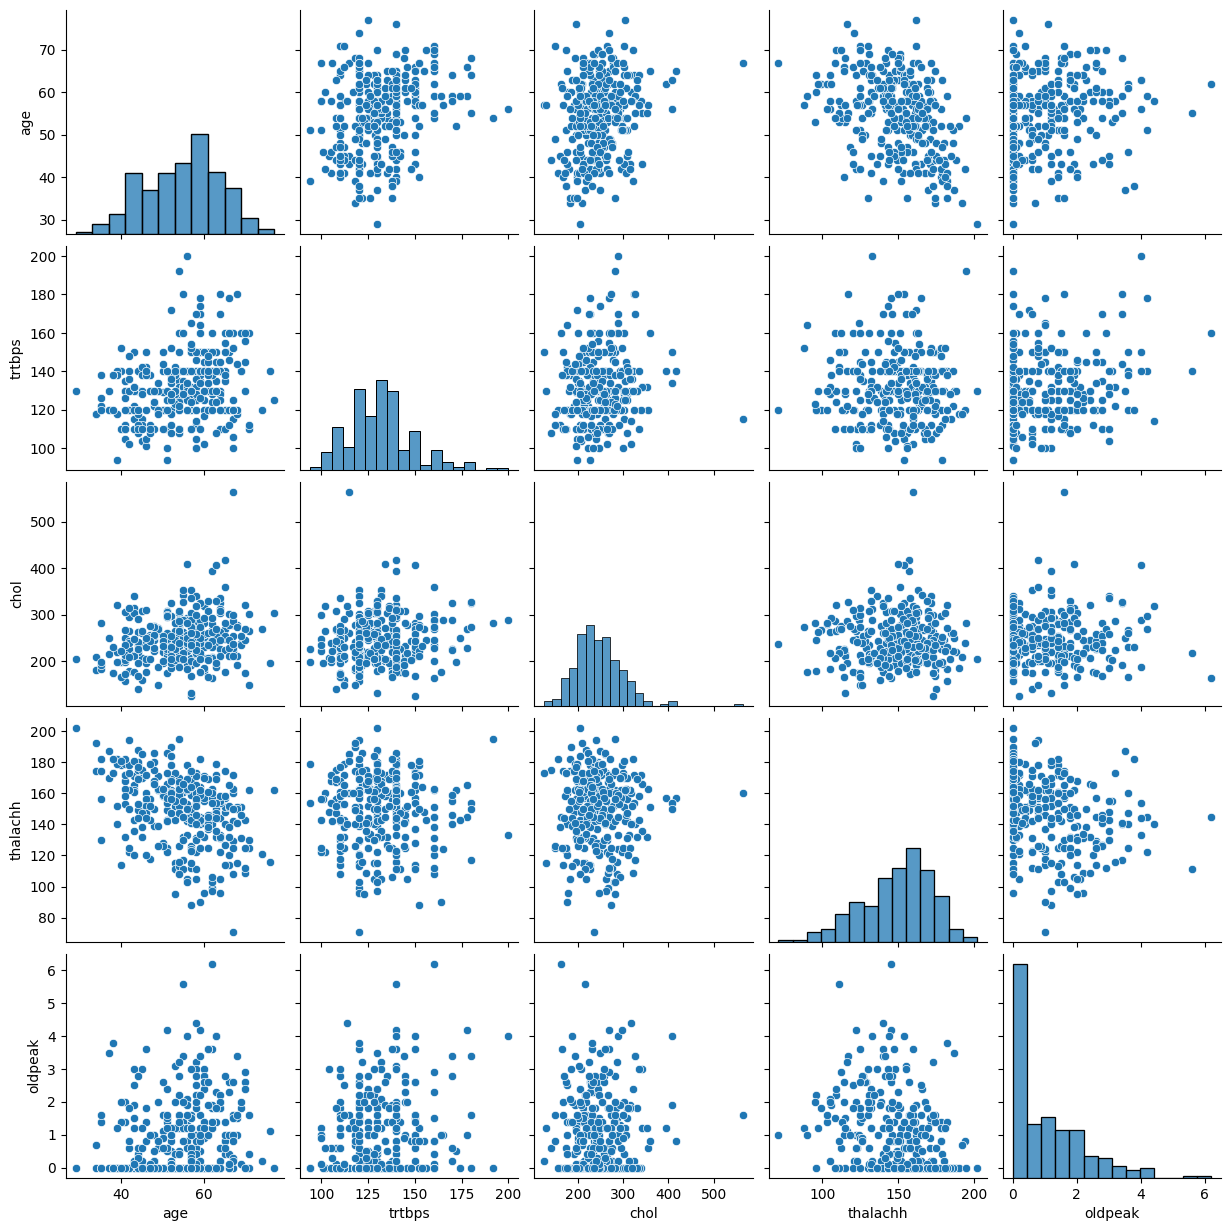

In [65]:
subdata=df[['age','trtbps','chol','thalachh','oldpeak']]
sns.pairplot(subdata)

<function matplotlib.pyplot.show(close=None, block=None)>

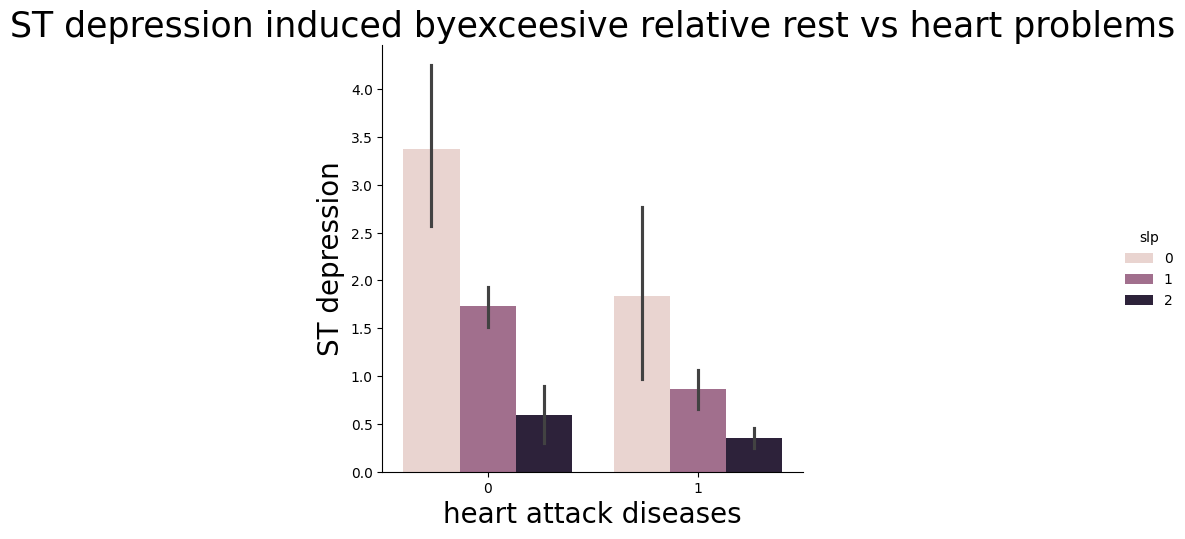

In [66]:
sns.catplot(x = 'output',y = 'oldpeak', hue='slp',
            kind = 'bar',data = df)
plt.title("ST depression induced byexceesive relative rest vs heart problems",size=25)
plt.xlabel("heart attack diseases",size=20)
plt.ylabel("ST depression",size=20)
plt.show          

<function matplotlib.pyplot.show(close=None, block=None)>

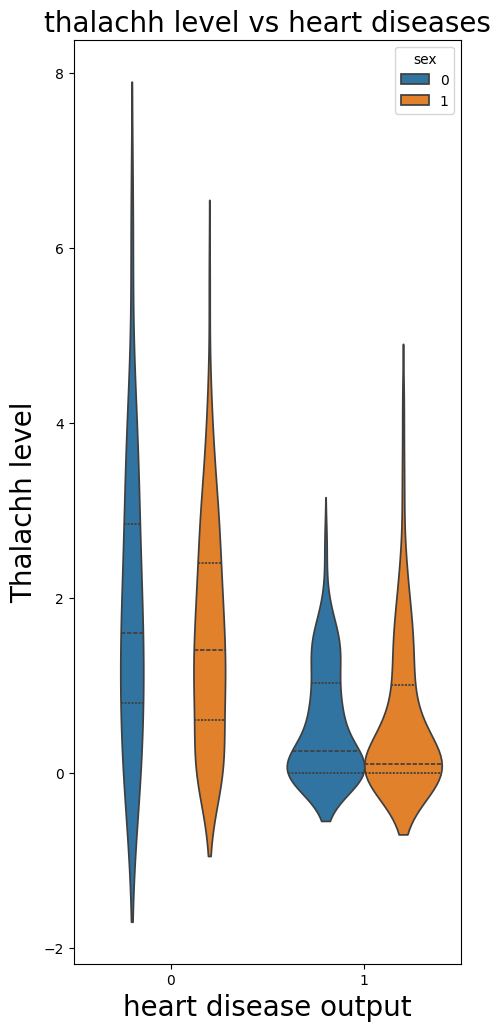

In [67]:
plt.figure(figsize=(5,12))
sns.violinplot(x='output',y='oldpeak',hue='sex',inner='quartile',data=df)
plt.title("thalachh level vs heart diseases", fontsize=20)
plt.xlabel("heart disease output", fontsize=20)
plt.ylabel("Thalachh level", fontsize =20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

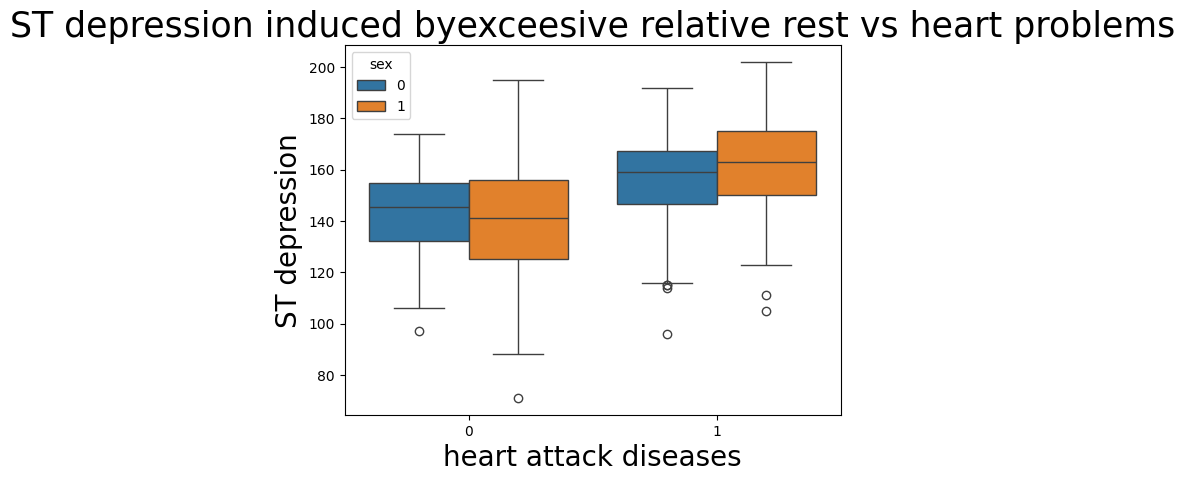

In [68]:
sns.boxplot(x = 'output',y = 'thalachh', hue='sex',
            data = df)
plt.title("ST depression induced byexceesive relative rest vs heart problems",size=25)
plt.xlabel("heart attack diseases",size=20)
plt.ylabel("ST depression",size=20)
plt.show          

In [69]:
#filter positive heart patients details
post_data=df[df['output']==1]
post_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [70]:
neg_data=df[df['output']==0]
neg_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [71]:
print("(positive patient ST depression):"+str(post_data['oldpeak'].mean()))

(positive patient ST depression):0.583030303030303


In [72]:
print("(Negative patient ST depression):"+str(neg_data['oldpeak'].mean()))

(Negative patient ST depression):1.5855072463768116


In [73]:
print("(positive patient thalachh):"+str(post_data['thalachh'].mean()))
print("(Negatove patient thalachh):"+str(post_data['thalachh'].mean()))

(positive patient thalachh):158.46666666666667
(Negatove patient thalachh):158.46666666666667


In [74]:
x=df.iloc[:,:-1].values  #feature variable(independent variable)
y=df.iloc[:,-1].values   #label data (dependent varuable)

In [75]:
from sklearn.model_selection import train_test_split   #used to split dataset into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)  #test_size=0.2 i.e, 20% - testig 80% - training

In [76]:
from sklearn.preprocessing import StandardScaler  #standardscaler - it makes zeromean and unitvariance(standared variance=1) 
#standardise means normalise the data useful for logistic regression, SVM, NeuralNetworlks.
sc=StandardScaler()   #use to scale training and test data
x_train=sc.fit_transform(x_train)  #fit_transform - compute mean and standred deviation ,,formula=x-M(mue)/sd
x_test=sc.transform(x_test)      

In [77]:
from sklearn.metrics import classification_report   #used to evaluate model performance
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression(random_state=1)
model1.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [78]:
#make predictions
y_pred=model1.predict(x_test)  #x_test=testing features

In [79]:
#evaluate performance
print(classification_report(y_test,y_pred))   #y_test=make predictions for x_test, and the results are compared with y_test to evaluate accuracy.

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [80]:
from sklearn.metrics import classification_report   #used to evaluate model performance
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier(random_state=1)
model2.fit(x_train,y_train)


RandomForestClassifier(random_state=1)

In [81]:
y_pred1=model2.predict(x_test)

In [82]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred1)   #Confusion Matrix provides detailed performance analysis, especially for imbalanced datasets.
print(cm)
accuracy_score(y_test,y_pred1)  #Accuracy Score gives an overall correctness percentage.

[[21  9]
 [ 3 28]]


0.8032786885245902

In [84]:
model2_feature_importances_df=pd.DataFrame(model2.feature_importances_, index=df.columns[:-1],columns=['feature importance'])
model2_feature_importances_df  

,feature importance
age,0.078135
sex,0.042061
cp,0.165800
trtbps,0.074767
chol,0.075866
fbs,0.008276
restecg,0.020139
thalachh,0.127722
exng,0.069496
oldpeak,0.099566


ROC AUC score: 0.8704301075268818


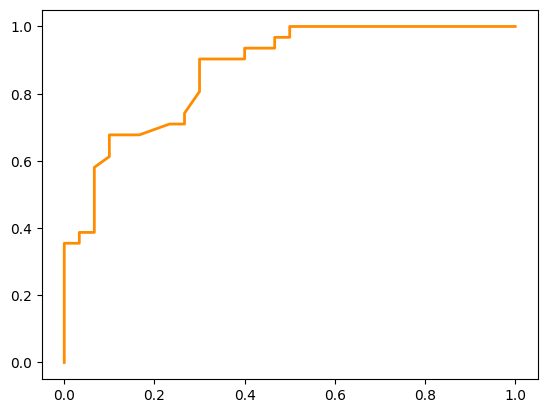

In [85]:
#roi
from sklearn.metrics import roc_curve, roc_auc_score  #roc_curve: Computes the False Positive Rate (FPR) and True Positive Rate (TPR) at different threshold values.
#roc_auc_score: Calculates the Area Under the ROC Curve (AUC score).
y_pred_prob=model2.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=roc_auc_score(y_test,y_pred_prob)
print("ROC AUC score:",roc_auc)
#plotting curve
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=2,label="ROC curve (area= %0.2f)" % roc_auc)

Measures how well the model differentiates between positive and negative classes.
A perfect classifier has an AUC score of 1.0.
Higher AUC = Better model performance.

AUC Score	Interpretation
0.5	Model is guessing randomly (no discrimination ability).
0.6 - 0.7	Poor performance.
0.7 - 0.8	Acceptable performance.
0.8 - 0.9	Good model.
0.9 - 1.0	Excellent model.
In this case, ROC AUC score = 0.87, which means the model has good classification performance.

In [86]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
y=df['output']
x=df.drop('output',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [89]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [90]:
#logisticregression
#NaivBayes
#RandomForestClassifier
#ExtremeGradientBoost
#K-nearestNeighbour
#DecisionTree
#SupportVectoreMachine
m1=LogisticRegression()
m2=GaussianNB()
m3=RandomForestClassifier()
m4=XGBClassifier()
m5=KNeighborsClassifier()
m6=DecisionTreeClassifier()
m7=SVC()

In [91]:
m1='LogisticRegression'
m2='NaiveBayes'
m3='RandomForestClassifier'
m4='ExtremeGradientBoost'
m5='K-nearestNeighbor'
m6='DecisionTree'
m7='SupportVectoreMechine'

In [92]:
lr=LogisticRegression()
mod1=lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
lr_conf_matrix=confusion_matrix(y_test,lr_predict)
lr_acc_score=accuracy_score(y_test,lr_predict)
print('ConfusionMatrix')
print(lr_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


ConfusionMatrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [93]:
lr=LogisticRegression()
mod1=lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
lr_conf_matrix=confusion_matrix(y_test,lr_predict)
lr_acc_score=accuracy_score(y_test,lr_predict)
print('ConfusionMatrix')
print(lr_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


ConfusionMatrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [94]:
lr=LogisticRegression()
mod1=lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
lr_conf_matrix=confusion_matrix(y_test,lr_predict)
lr_acc_score=accuracy_score(y_test,lr_predict)
print('ConfusionMatrix')
print(lr_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


ConfusionMatrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [95]:
lr=LogisticRegression()
mod1=lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
lr_conf_matrix=confusion_matrix(y_test,lr_predict)
lr_acc_score=accuracy_score(y_test,lr_predict)
print('ConfusionMatrix')
print(lr_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


ConfusionMatrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [96]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
nb_conf_matrix=confusion_matrix(y_test,nb_predict)
nb_acc_score=accuracy_score(y_test,nb_predict)
print('ConfusionMatrix')
print(nb_conf_matrix)
print('\n')
print("Accuracy of Naiv Bayes:", nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predict))


ConfusionMatrix
[[21  6]
 [ 3 31]]


Accuracy of Naiv Bayes: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [97]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix=confusion_matrix(y_test,rf_predict)
rf_acc_score=accuracy_score(y_test,rf_predict)
print('ConfusionMatrix')
print(rf_conf_matrix)
print('\n')
print("Accuracy of Random Forest :", rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predict))


ConfusionMatrix
[[22  5]
 [ 5 29]]


Accuracy of Random Forest : 83.60655737704919 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [99]:
xgb=XGBClassifier(learning_rate=0.01,n_estimators=25,
                  max_depth=15,gamma=0.6,subsample=0.52,
                  colsample_bytree=0.6,seed=27,reg_lambda=2,
                  booster='dart',colsample_bylevel=0.6,colsample_bynode=0.5)
xgb.fit(x_train,y_train)
xgb_predict=xgb.predict(x_test)
xgb_conf_matrix=confusion_matrix(y_test,xgb_predict)
xgb_acc_score=accuracy_score(y_test,xgb_predict)
print('ConfusionMatrix')
print(xgb_conf_matrix)
print('\n')
print("Accuracy of Extreme Gradient Boost:", xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predict))


ConfusionMatrix
[[ 9 18]
 [ 0 34]]


Accuracy of Extreme Gradient Boost: 70.49180327868852 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        27
           1       0.65      1.00      0.79        34

    accuracy                           0.70        61
   macro avg       0.83      0.67      0.65        61
weighted avg       0.81      0.70      0.66        61



In [100]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)
knn_conf_matrix=confusion_matrix(y_test,knn_predict)
knn_acc_score=accuracy_score(y_test,knn_predict)
print('ConfusionMatrix')
print(knn_conf_matrix)
print('\n')
print("Accuracy of K-NearestNeighbor model:", knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predict))


ConfusionMatrix
[[24  3]
 [ 4 30]]


Accuracy of K-NearestNeighbor model: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [105]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0,
                         max_depth=6)
dt.fit(x_train,y_train)
dt_predict=dt.predict(x_test)
dt_conf_matrix=confusion_matrix(y_test,dt_predict)
dt_acc_score=accuracy_score(y_test,dt_predict)
print('ConfusionMatrix')
print(dt_conf_matrix)
print('\n')
print("Accuracy of Decision Tree:", dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predict))


ConfusionMatrix
[[23  4]
 [ 7 27]]


Accuracy of Decision Tree: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [106]:
svc=SVC(kernel='rbf',random_state=0,C=2)
svc.fit(x_train,y_train)
svc_predict=svc.predict(x_test)
svc_conf_matrix=confusion_matrix(y_test,svc_predict)
svc_acc_score=accuracy_score(y_test,svc_predict)
print('ConfusionMatrix')
print(svc_conf_matrix)
print('\n')
print("Accuracy of Support vector mechine model:", svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predict))



ConfusionMatrix
[[23  4]
 [ 3 31]]


Accuracy of Support vector mechine model: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [108]:
df.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

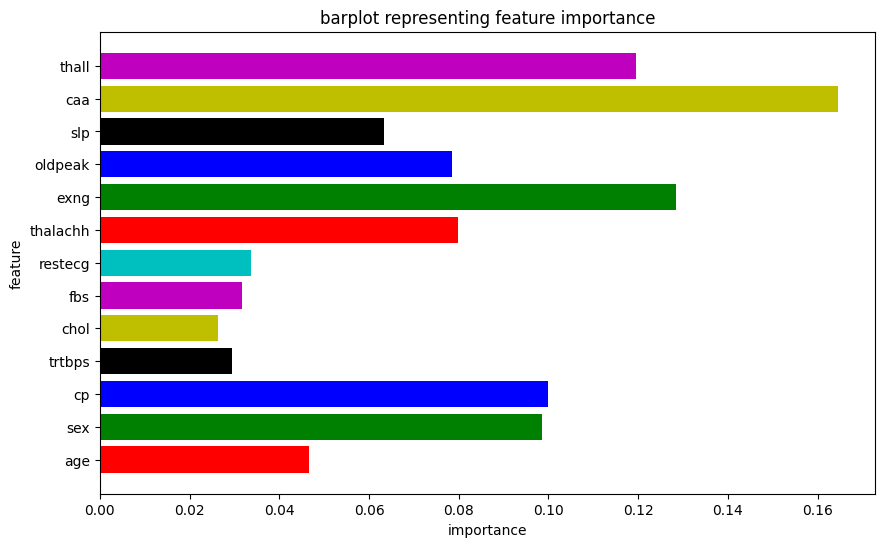

In [111]:
imp_feature=pd.DataFrame({'feature':['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
                         'importance':xgb.feature_importances_})
plt.figure(figsize=(10,6))
plt.title("barplot representing feature importance")
plt.xlabel('importance')
plt.ylabel('feature')
plt.barh(imp_feature['feature'],imp_feature['importance'],color=['r','g','b','k','y','m','c'])
plt.show()
                         

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_false_positive_rate,lr_true_positive_rate,threshold=roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,threshold=roc_curve(y_test,nb_predict)
rf_false_positive_rate,rf_true_positive_rate,threshold=roc_curve(y_test,rf_predict)
xgb_false_positive_rate,xgb_true_positive_rate,threshold=roc_curve(y_test,xgb_predict)
knn_false_positive_rate,knn_true_positive_rate,threshold=roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,threshold=roc_curve(y_test,dt_predict)
svc_false_positive_rate,svc_true_positive_rate,threshold=roc_curve(y_test,svc_predict)

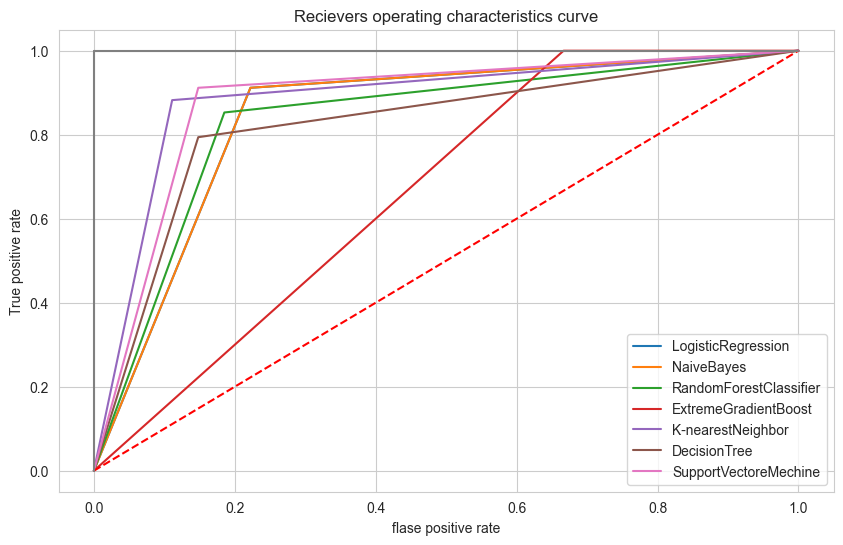

In [118]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Recievers operating characteristics curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label=m1)
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label=m2)
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label=m3)
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label=m4)
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label=m5)
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label=m6)
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label=m7)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.plot([0,0],[1,0],c='0.5')
plt.plot([1,1],c='0.5')
plt.xlabel('flase positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [120]:
model_eval=pd.DataFrame({'model':[m1,m2,m3,m4,m5,m6,m7],
                         'accuracy':[lr_acc_score*100,
                                     nb_acc_score*100,
                                     rf_acc_score*100,
                                     xgb_acc_score*100,
                                     knn_acc_score*100,
                                     dt_acc_score*100,
                                     svc_acc_score*100,]})
model_eval

,model,accuracy
0,LogisticRegression,85.245902
1,NaiveBayes,85.245902
2,RandomForestClassifier,83.606557
3,ExtremeGradientBoost,70.491803
4,K-nearestNeighbor,88.524590
5,DecisionTree,81.967213
6,SupportVectoreMechine,88.524590


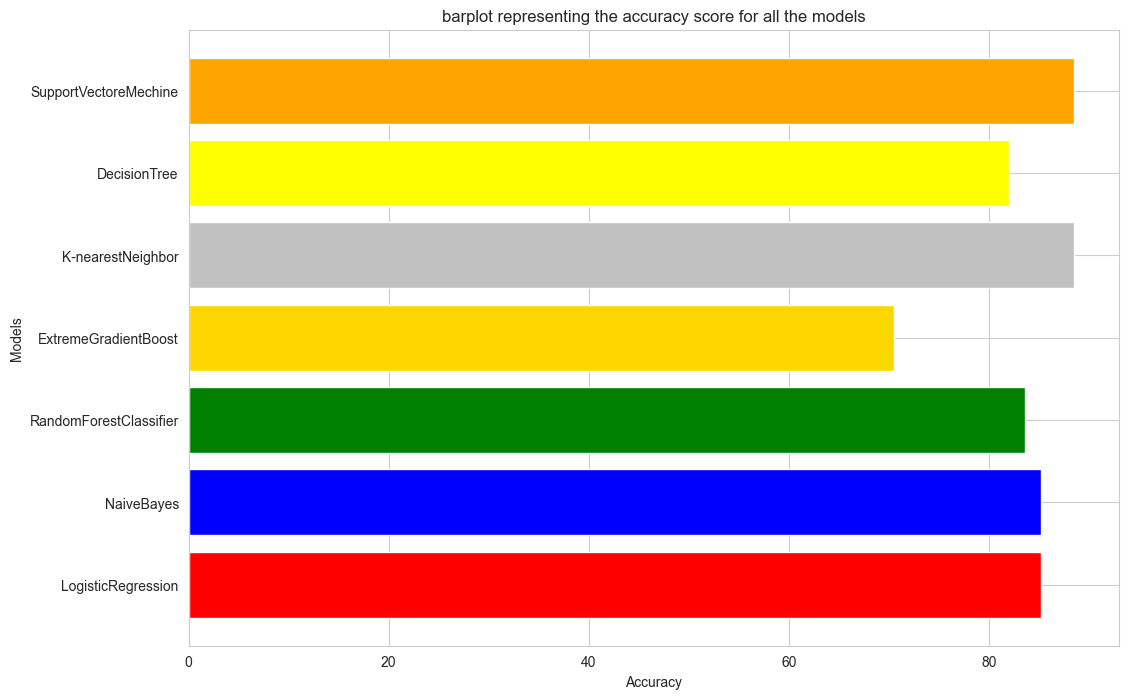

In [124]:
colors=['red','blue','green','gold','silver','yellow','orange']
plt.figure(figsize=(12,8))
plt.title("barplot representing the accuracy score for all the models")
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.barh(model_eval['model'],model_eval['accuracy'],color=colors)
plt.show()